# Why Diversity Leads to Better Decision-Making

A Jupyter notebook for the blog post [Why Diversity Leads to Better Decision-Making](http://www.google.com).

## Environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
def create_covariance_matrix(seed, dist):
    np.random.seed(seed)
    return np.array([
        [1.0, dist[0], dist[1], dist[2], dist[3]],
        [dist[4], 1.0, dist[5], dist[6], dist[7]],
        [dist[8], dist[9], 1.0, dist[10], dist[11]],
        [dist[12], dist[13], dist[14], 1.0, dist[15]],
        [dist[16], dist[17], dist[18], dist[19], 1.0]
    ])

## Team Diverse

### Constant Decision-Making Abilility: X = 50

In [3]:
np.random.seed(7)
team_diversity_correlations = np.random.normal(0, 1, 20)
team_diversity_correlations

array([ 1.69052570e+00, -4.65937371e-01,  3.28201637e-02,  4.07516283e-01,
       -7.88923029e-01,  2.06557291e-03, -8.90385858e-04, -1.75472431e+00,
        1.01765801e+00,  6.00498516e-01, -6.25428974e-01, -1.71548261e-01,
        5.05299374e-01, -2.61356415e-01, -2.42749079e-01, -1.45324141e+00,
        5.54580312e-01,  1.23880905e-01,  2.74459924e-01, -1.52652453e+00])

In [4]:
team_diversity_cov = create_covariance_matrix(47, team_diversity_correlations)
team_diversity_cov

array([[ 1.00000000e+00,  1.69052570e+00, -4.65937371e-01,
         3.28201637e-02,  4.07516283e-01],
       [-7.88923029e-01,  1.00000000e+00,  2.06557291e-03,
        -8.90385858e-04, -1.75472431e+00],
       [ 1.01765801e+00,  6.00498516e-01,  1.00000000e+00,
        -6.25428974e-01, -1.71548261e-01],
       [ 5.05299374e-01, -2.61356415e-01, -2.42749079e-01,
         1.00000000e+00, -1.45324141e+00],
       [ 5.54580312e-01,  1.23880905e-01,  2.74459924e-01,
        -1.52652453e+00,  1.00000000e+00]])

In [5]:
np.random.seed(7)
team_diversity_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_diversity_cov, size = 500)
team_diversity_df = pd.DataFrame(data = team_diversity_output, columns = ['diverse_1', 'diverse_2', 'diverse_3', 'diverse_4', 'diverse_5']) \
    .assign(diversity_decision = lambda df: df.mean(axis = 1))

team_diversity_df.describe()

C:\Users\Jason\AppData\Local\Temp/ipykernel_25128/766429146.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_diversity_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_diversity_cov, size = 500)


,diverse_1,diverse_2,diverse_3,diverse_4,diverse_5,diversity_decision
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.960756,49.969036,50.036649,49.950810,49.939348,49.971320
std,1.278710,1.400716,1.022136,1.284732,1.574430,0.484567
min,46.835303,45.128707,46.968316,46.472059,43.630266,48.660348
25%,49.077846,49.067883,49.337237,49.112873,48.883814,49.644718
50%,49.921584,49.988565,49.945095,49.921922,49.975182,49.965873
75%,50.867502,50.879474,50.777723,50.789107,51.034436,50.276802
max,53.366599,54.212764,52.962603,53.185615,54.800983,51.391660


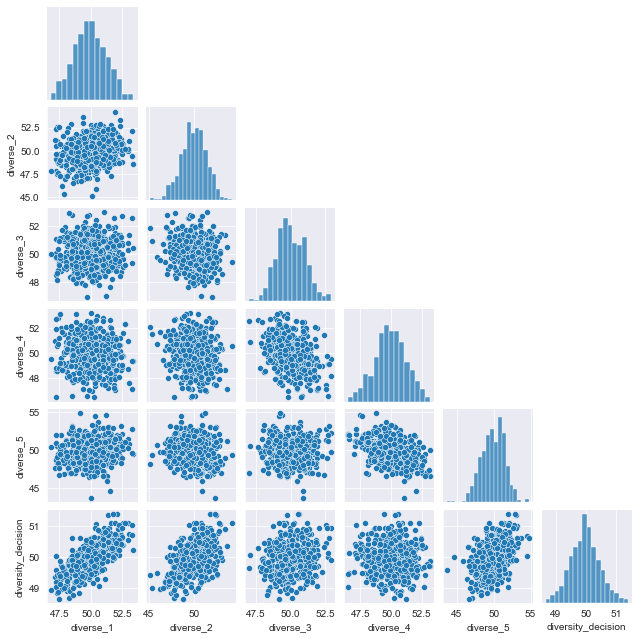

In [6]:
sns.pairplot(team_diversity_df, height = 1.5, corner = True)

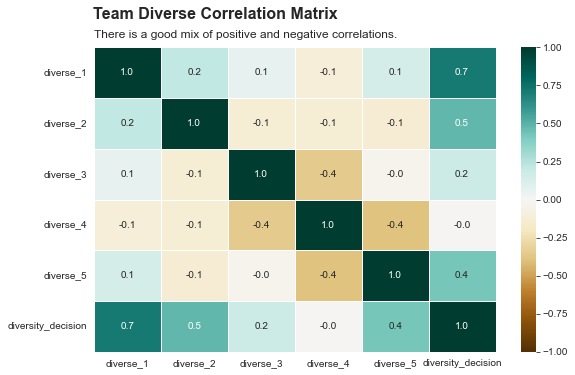

In [31]:
plt.figure(figsize=(9, 5.6))

sns.heatmap(team_diversity_df.corr(), annot=True, fmt='.1f', linewidths=.5, vmin=-1, center=0, vmax=1, cmap='BrBG')
plt.suptitle('Team Diverse Correlation Matrix', x=0.313, fontsize=16, fontweight='bold')
plt.title('There is a good mix of positive and negative correlations.', fontsize=12, loc='left', pad=10)

plt.savefig('team_diverse.png', bbox_inches='tight', dpi=300)

### Variable Decision-Making Ability: X = {40, 50, 50, 60, 75}

In [8]:
np.random.seed(7)
team_diversity_variable_output = np.random.multivariate_normal(mean = [40., 50., 50., 60., 75.], cov = team_diversity_cov, size = 500)
team_diversity_variable_df = pd.DataFrame(data = team_diversity_variable_output, columns = ['diverse_1', 'diverse_2', 'diverse_3', 'diverse_4', 'diverse_5']) \
    .assign(diversity_variable_decision = lambda df: df.mean(axis = 1))

team_diversity_variable_df.describe()

C:\Users\Jason\AppData\Local\Temp/ipykernel_25128/2196061867.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_diversity_variable_output = np.random.multivariate_normal(mean = [40., 50., 50., 60., 75.], cov = team_diversity_cov, size = 500)


,diverse_1,diverse_2,diverse_3,diverse_4,diverse_5,diversity_variable_decision
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.960756,49.969036,50.036649,59.950810,74.939348,54.971320
std,1.278710,1.400716,1.022136,1.284732,1.574430,0.484567
min,36.835303,45.128707,46.968316,56.472059,68.630266,53.660348
25%,39.077846,49.067883,49.337237,59.112873,73.883814,54.644718
50%,39.921584,49.988565,49.945095,59.921922,74.975182,54.965873
75%,40.867502,50.879474,50.777723,60.789107,76.034436,55.276802
max,43.366599,54.212764,52.962603,63.185615,79.800983,56.391660


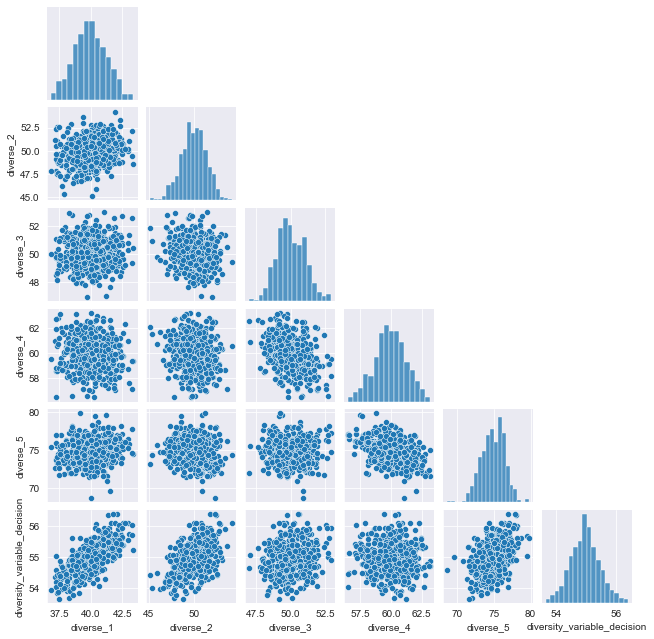

In [9]:
sns.pairplot(team_diversity_variable_df, height = 1.5, corner = True)

<AxesSubplot:>

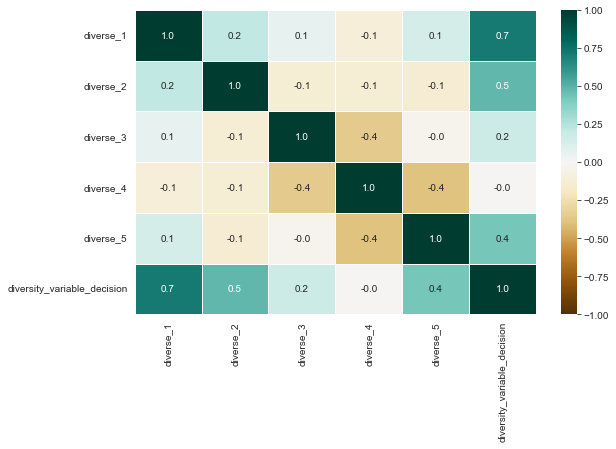

In [10]:
# Check that the correlations are the same as before.
plt.figure(figsize=(9, 5.6))
sns.heatmap(team_diversity_variable_df.corr(), annot=True, fmt='.1f', linewidths=.5, vmin=-1, center=0, vmax=1, cmap='BrBG')

## Team Boring

### Constant Decision-Making Ability: X = 50

In [11]:
np.random.seed(7)
# Take the absolute value to ensure that there are positive correlations.
team_boring_correlations = abs(np.random.normal(0, 1, 20))
team_boring_correlations

array([1.69052570e+00, 4.65937371e-01, 3.28201637e-02, 4.07516283e-01,
       7.88923029e-01, 2.06557291e-03, 8.90385858e-04, 1.75472431e+00,
       1.01765801e+00, 6.00498516e-01, 6.25428974e-01, 1.71548261e-01,
       5.05299374e-01, 2.61356415e-01, 2.42749079e-01, 1.45324141e+00,
       5.54580312e-01, 1.23880905e-01, 2.74459924e-01, 1.52652453e+00])

In [12]:
team_boring_cov = create_covariance_matrix(47, team_boring_correlations)
team_boring_cov

array([[1.00000000e+00, 1.69052570e+00, 4.65937371e-01, 3.28201637e-02,
        4.07516283e-01],
       [7.88923029e-01, 1.00000000e+00, 2.06557291e-03, 8.90385858e-04,
        1.75472431e+00],
       [1.01765801e+00, 6.00498516e-01, 1.00000000e+00, 6.25428974e-01,
        1.71548261e-01],
       [5.05299374e-01, 2.61356415e-01, 2.42749079e-01, 1.00000000e+00,
        1.45324141e+00],
       [5.54580312e-01, 1.23880905e-01, 2.74459924e-01, 1.52652453e+00,
        1.00000000e+00]])

In [13]:
np.random.seed(7)
team_boring_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_boring_cov, size = 500)
team_boring_df = pd.DataFrame(data = team_boring_output, columns = ['boring_1', 'boring_2', 'boring_3', 'boring_4', 'boring_5']) \
    .assign(boring_decision = lambda df: df.mean(axis = 1))

team_boring_df.describe()

C:\Users\Jason\AppData\Local\Temp/ipykernel_25128/2361734816.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_boring_output = np.random.multivariate_normal(mean = [50., 50., 50., 50., 50.], cov = team_boring_cov, size = 500)


,boring_1,boring_2,boring_3,boring_4,boring_5,boring_decision
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.994371,49.979572,50.033780,50.045050,49.926588,49.995872
std,1.033491,1.278675,0.867988,1.323142,1.517306,0.837764
min,47.292342,46.174664,47.669220,45.752950,43.905601,47.744801
25%,49.309670,49.118798,49.423779,49.200148,48.889945,49.412140
50%,49.996408,49.959578,50.001831,49.971401,50.016049,50.005180
75%,50.680580,50.861599,50.629155,50.817947,51.011921,50.537984
max,52.895390,53.561017,52.844607,53.959021,54.428537,52.411897


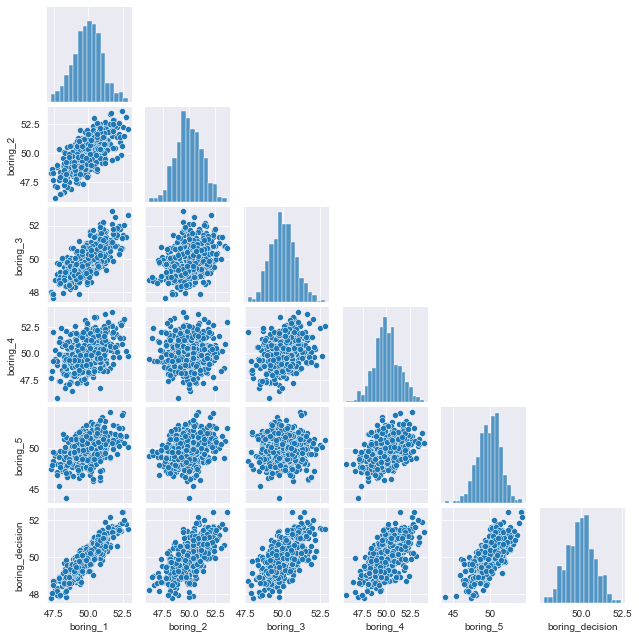

In [14]:
sns.pairplot(team_boring_df, height = 1.5, corner = True)

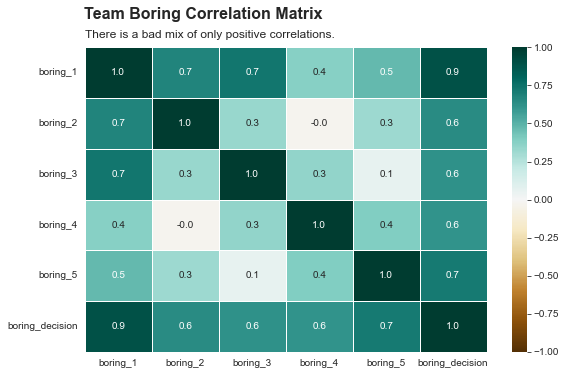

In [22]:
plt.figure(figsize=(9, 5.6))

sns.heatmap(team_boring_df.corr(), annot=True, fmt='.1f', linewidths=.5, vmin=-1, center=0, vmax=1, cmap='BrBG')
plt.suptitle('Team Boring Correlation Matrix', x=0.308, fontsize=16, fontweight='bold')
plt.title('There is a bad mix of only positive correlations.', fontsize=12, loc='left', pad=10)

plt.savefig('team_boring.png', bbox_inches='tight', dpi=300)

### Variable Decision-Making Ability: X = {30, 40, 50, 50, 70}

In [16]:
np.random.seed(7)
team_boring_variable_output = np.random.multivariate_normal(mean = [30., 40., 50., 50., 70.], cov = team_boring_cov, size = 500)
team_boring_variable_df = pd.DataFrame(data = team_boring_variable_output, columns = ['boring_1', 'boring_2', 'boring_3', 'boring_4', 'boring_5']) \
    .assign(boring_variable_decision = lambda df: df.mean(axis = 1))

team_boring_df.describe()

C:\Users\Jason\AppData\Local\Temp/ipykernel_25128/1541428508.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  team_boring_variable_output = np.random.multivariate_normal(mean = [30., 40., 50., 50., 70.], cov = team_boring_cov, size = 500)


,boring_1,boring_2,boring_3,boring_4,boring_5,boring_decision
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.994371,49.979572,50.033780,50.045050,49.926588,49.995872
std,1.033491,1.278675,0.867988,1.323142,1.517306,0.837764
min,47.292342,46.174664,47.669220,45.752950,43.905601,47.744801
25%,49.309670,49.118798,49.423779,49.200148,48.889945,49.412140
50%,49.996408,49.959578,50.001831,49.971401,50.016049,50.005180
75%,50.680580,50.861599,50.629155,50.817947,51.011921,50.537984
max,52.895390,53.561017,52.844607,53.959021,54.428537,52.411897


<AxesSubplot:>

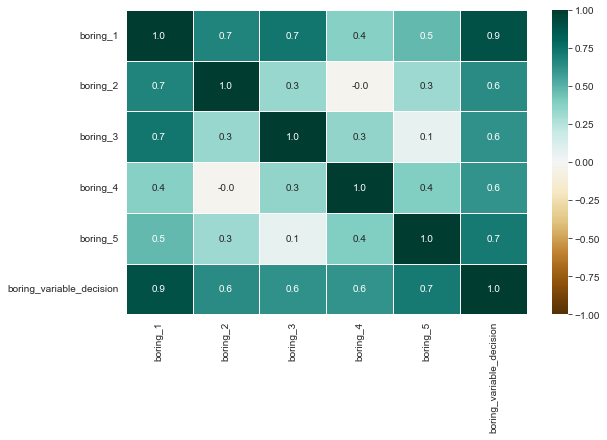

In [17]:
# Check that the correlations are the same as before.
plt.figure(figsize=(9, 5.6))
sns.heatmap(team_boring_variable_df.corr(), annot=True, fmt='.1f', linewidths=.5, vmin=-1, center=0, vmax=1, cmap='BrBG')

## Decision Variance

In [18]:
decision_df = pd.concat(
    [team_diversity_df['diversity_decision'], 
     team_diversity_variable_df['diversity_variable_decision'],
     team_boring_df['boring_decision'],
     team_boring_variable_df['boring_variable_decision']], 
    axis = 1)

decision_df.head()

,diversity_decision,diversity_variable_decision,boring_decision,boring_variable_decision
0,49.208029,54.208029,48.626799,46.626799
1,49.571632,54.571632,50.254942,48.254942
2,50.225290,55.225290,50.434292,48.434292
3,50.189977,55.189977,51.207064,49.207064
4,49.267983,54.267983,48.744480,46.744480


In [19]:
decision_df.describe()

,diversity_decision,diversity_variable_decision,boring_decision,boring_variable_decision
count,500.000000,500.000000,500.000000,500.000000
mean,49.971320,54.971320,49.995872,47.995872
std,0.484567,0.484567,0.837764,0.837764
min,48.660348,53.660348,47.744801,45.744801
25%,49.644718,54.644718,49.412140,47.412140
50%,49.965873,54.965873,50.005180,48.005180
75%,50.276802,55.276802,50.537984,48.537984
max,51.391660,56.391660,52.411897,50.411897


In [20]:
# Calculate the reduction in variance due to the increased correlation of inputs.
diversity_sample_variance = np.var(decision_df['diversity_decision'])
boring_sample_variance = np.var(decision_df['boring_decision'])

((diversity_sample_variance - boring_sample_variance) / boring_sample_variance) * 100

-66.54476206829459

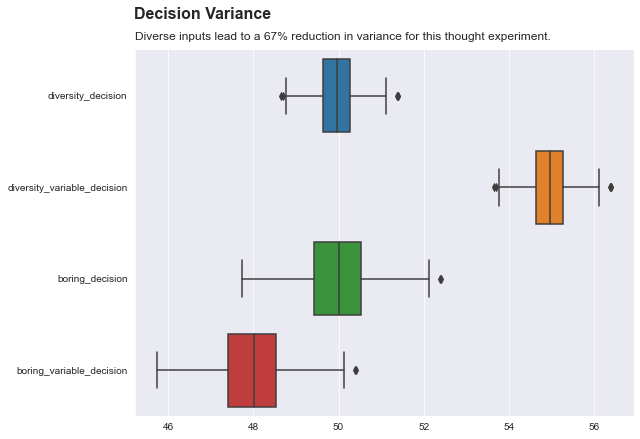

In [27]:
# plt.figure(figsize=(9, 5.6))
sns.catplot(data = decision_df, orient = 'h', kind = 'box', height = 5.6, aspect = 1.607)
plt.suptitle('Decision Variance', x = .318, y = 1.08, fontsize=16, fontweight='bold')
plt.title('Diverse inputs lead to a 67% reduction in variance for this thought experiment.', fontsize=12, loc='left', pad=10)

plt.savefig('decision_box_plot.png', bbox_inches='tight', dpi=300)